In [21]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [22]:
### Parameters1

Vmax = 80 #max speed of traffic, in kilometers per hour
L = 11 #length of the road, in kilometers
rhomax = 250 #traffic density, in cars per kilometer
nx = 51
dx = 11/(nx - 1)
dt = 0.001
nt = 100
x = numpy.linspace(0, L, nx)
rhon = numpy.empty(nx)
t = 0

In [23]:
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50

In [24]:
import sympy

In [25]:
rho, t = sympy.symbols('rho t')
F = Vmax*rho*(1-rho/rhomax)
F

80*rho*(-rho/250 + 1)

In [26]:
rho = rho0
Fprime = Vmax - 2*rho*Vmax/rhomax

In [27]:
for n in range(nt):
    rhon = rho.copy()
    Fprime = Vmax - 2*rho*Vmax/rhomax
    rho[1:] = rhon[1:] - Fprime[1:]*dt/dx*(rhon[1:]-rhon[:-1])
    
    rho[0] = rhon[0] - 73.6*dt/dx*(rhon[0]-rhon[-1])

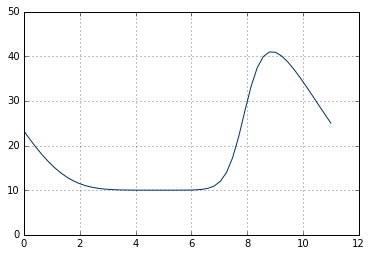

In [28]:
pyplot.plot(x, rho, color='#003366')
pyplot.ylim(0, 50);
pyplot.grid(True)

In [29]:
a = max(rho)
print('rhomax1 =', a)

rhomax1 = 40.9643389986


In [30]:
Vmin = Vmax*(1 - a/rhomax)
print('Vmin = ', Vmin)

Vmin =  66.8914115205


In [31]:
b = numpy.mean(rho)
b

19.022602446811661

In [32]:
Vaverage = Vmax*(1 - b/rhomax)
Vaverage

73.91276721702026

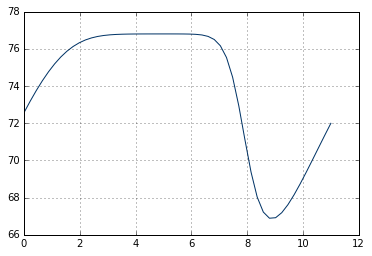

In [33]:
V = Vmax*(1 - rho/rhomax)
pyplot.plot(x, V, color='#003366')
pyplot.grid(True)

In [34]:
c = numpy.mean(V)
c

73.912767217020274

In [35]:
def average(V, total = 0.0):
    num = 0
    for i in V:
        total += i
        num += 1
    return total/num

In [36]:
average(V)

73.91276721702026

In [38]:
min(V)/3.6

18.580947644571953